In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df=pd.read_csv('/content/final.csv')

In [3]:
df

,usedCarSkuId,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,power,seats,doors,state
0,7111bf25-97af-47f9-867b-40879190d800,maruti wagon r,2016,370000,69162,cng,dealer,manual,first,16.60,1061,58.16 bhp,5.0,5.0,uttar pradesh
1,c309efc1-efaf-4f82-81ad-dcb38eb36665,maruti celerio,2015,365000,45864,cng,dealer,manual,first,22.20,998,58.2 bhp,5.0,5.0,maharashtra
2,7609f710-0c97-4f00-9a47-9b9284b62d3a,honda amaze,2015,421000,81506,cng,dealer,manual,second,23.80,1498,86.7 bhp,5.0,4.0,delhi
3,278b76e3-5539-4a5e-ae3e-353a2e3b6d7d,maruti wagon r,2013,240000,115893,cng,dealer,manual,second,16.20,1061,58.2 bhp,5.0,4.0,delhi
4,b1eab99b-a606-48dd-a75b-57feb8a9ad92,maruti ertiga,2022,1175000,18900,cng,dealer,manual,first,24.42,1248,86.63 bhp,7.0,5.0,maharashtra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37808,ee6ce523-2aa6-4852-96a1-86b9bc277377,tata nexon,2018,881000,49882,diesel,dealer,manual,second,16.50,1198,108.5 bhp,5.0,5.0,maharashtra
37809,ba1994ac-53ab-4baf-913e-b72f01a37b5d,tata manza,2011,245000,82843,diesel,dealer,manual,first,19.82,1248,88.8 bhp,5.0,4.0,maharashtra
37810,8f4448ae-53f5-4a3f-b13d-2401dd60c624,tata altroz,2020,735000,58000,diesel,dealer,manual,first,18.00,1100,88.77 bhp,5.0,5.0,maharashtra
37811,dbf9b629-7215-494b-a62d-ba1408531362,tata indica ev2,2014,225000,62000,diesel,dealer,manual,first,18.00,1100,69 bhp,5.0,5.0,maharashtra


In [4]:
print(f'Our Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Our Dataset has 37813 rows and 15 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37813 entries, 0 to 37812
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   usedCarSkuId   37813 non-null  object 
 1   name           37813 non-null  object 
 2   year           37813 non-null  int64  
 3   selling_price  37813 non-null  int64  
 4   km_driven      37813 non-null  int64  
 5   fuel           37813 non-null  object 
 6   seller_type    37813 non-null  object 
 7   transmission   37813 non-null  object 
 8   owner          37813 non-null  object 
 9   mileage        37813 non-null  float64
 10  engine         37813 non-null  int64  
 11  power          37813 non-null  object 
 12  seats          37802 non-null  float64
 13  doors          37772 non-null  float64
 14  state          37813 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 4.3+ MB


In [6]:
power=[]
for i in df['power']:
  a=str(i).replace('bhp','')
  b=a.split(' ')
  try:
    c=float(b[0])
    power.append(c)
  except:
    c=0
    power.append(c)

In [7]:
df['power']=power

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37813 entries, 0 to 37812
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   usedCarSkuId   37813 non-null  object 
 1   name           37813 non-null  object 
 2   year           37813 non-null  int64  
 3   selling_price  37813 non-null  int64  
 4   km_driven      37813 non-null  int64  
 5   fuel           37813 non-null  object 
 6   seller_type    37813 non-null  object 
 7   transmission   37813 non-null  object 
 8   owner          37813 non-null  object 
 9   mileage        37813 non-null  float64
 10  engine         37813 non-null  int64  
 11  power          37813 non-null  float64
 12  seats          37802 non-null  float64
 13  doors          37772 non-null  float64
 14  state          37813 non-null  object 
dtypes: float64(4), int64(4), object(7)
memory usage: 4.3+ MB


In [9]:
df.isnull().sum()

,0
usedCarSkuId,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0


In [10]:
df.dropna(inplace=True)

In [11]:
df['seats']=df['seats'].astype(int)
df['doors']=df['doors'].astype(int)

In [12]:
df.duplicated().sum()

0

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.describe()

,year,selling_price,km_driven,mileage,engine,power,seats,doors
count,37772.000000,3.777200e+04,3.777200e+04,37772.000000,37772.000000,37772.000000,37772.000000,37772.000000
mean,2015.570211,7.983230e+05,6.241607e+04,18.742620,1422.828947,101.853241,5.237133,4.664116
std,3.775745,3.037237e+06,5.848137e+04,3.844201,440.994254,43.674115,0.720928,0.496517
min,1983.000000,1.196300e+04,1.010000e+02,0.000000,0.000000,0.000000,0.000000,2.000000
25%,2013.000000,3.200000e+05,3.175275e+04,16.500000,1197.000000,74.000000,5.000000,4.000000
50%,2016.000000,5.250000e+05,5.673500e+04,18.600000,1248.000000,88.500000,5.000000,5.000000
75%,2018.000000,8.550000e+05,8.330325e+04,22.000000,1498.000000,118.350000,5.000000,5.000000
max,2023.000000,5.500006e+08,6.300000e+06,40.900000,3604.000000,769.310000,14.000000,6.000000


In [15]:
df['company']=df['name'].apply(lambda x:x.split(' ')[0])
try:
  df['model']=df['name'].apply(lambda x:x.split(' ')[1:])
  df['model']=df['model'].apply(lambda x:' '.join(x))
except:
  df['model']='model'

In [16]:
df

,usedCarSkuId,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,power,seats,doors,state,company,model
0,7111bf25-97af-47f9-867b-40879190d800,maruti wagon r,2016,370000,69162,cng,dealer,manual,first,16.60,1061,58.16,5,5,uttar pradesh,maruti,wagon r
1,c309efc1-efaf-4f82-81ad-dcb38eb36665,maruti celerio,2015,365000,45864,cng,dealer,manual,first,22.20,998,58.20,5,5,maharashtra,maruti,celerio
2,7609f710-0c97-4f00-9a47-9b9284b62d3a,honda amaze,2015,421000,81506,cng,dealer,manual,second,23.80,1498,86.70,5,4,delhi,honda,amaze
3,278b76e3-5539-4a5e-ae3e-353a2e3b6d7d,maruti wagon r,2013,240000,115893,cng,dealer,manual,second,16.20,1061,58.20,5,4,delhi,maruti,wagon r
4,b1eab99b-a606-48dd-a75b-57feb8a9ad92,maruti ertiga,2022,1175000,18900,cng,dealer,manual,first,24.42,1248,86.63,7,5,maharashtra,maruti,ertiga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37808,ee6ce523-2aa6-4852-96a1-86b9bc277377,tata nexon,2018,881000,49882,diesel,dealer,manual,second,16.50,1198,108.50,5,5,maharashtra,tata,nexon
37809,ba1994ac-53ab-4baf-913e-b72f01a37b5d,tata manza,2011,245000,82843,diesel,dealer,manual,first,19.82,1248,88.80,5,4,maharashtra,tata,manza
37810,8f4448ae-53f5-4a3f-b13d-2401dd60c624,tata altroz,2020,735000,58000,diesel,dealer,manual,first,18.00,1100,88.77,5,5,maharashtra,tata,altroz
37811,dbf9b629-7215-494b-a62d-ba1408531362,tata indica ev2,2014,225000,62000,diesel,dealer,manual,first,18.00,1100,69.00,5,5,maharashtra,tata,indica ev2


In [17]:
df.drop(['usedCarSkuId','name'],axis=1,inplace=True)

##Price

In [18]:
print(f'The Lowest Selling Price in our dataset is {df["selling_price"].min()}')
print(f'The Highest Selling Price in our dataset is {df["selling_price"].max()}')

The Lowest Selling Price in our dataset is 11963
The Highest Selling Price in our dataset is 550000555


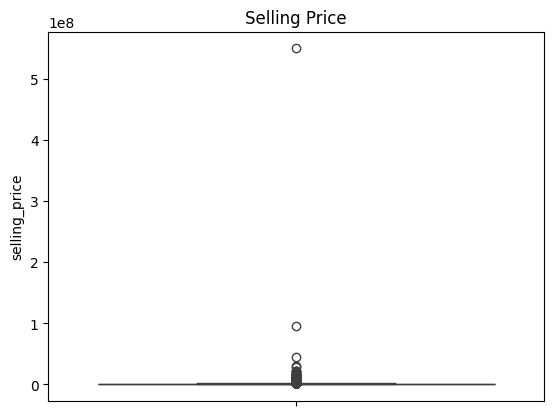

In [19]:
sns.boxplot(data=df,y='selling_price')
plt.title('Selling Price')
plt.show()

In [20]:
q1=df['selling_price'].quantile(0.25)
q3=df['selling_price'].quantile(0.75)
iqr=q3-q1
df_1=df[~((df['selling_price']<(q1-1.5*iqr))|(df['selling_price']>(q3+1.5*iqr)))]



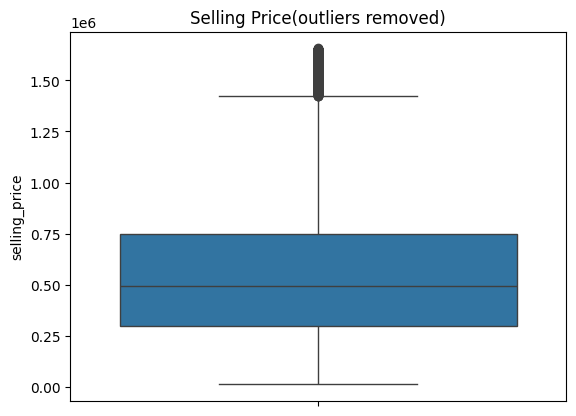

In [21]:
sns.boxplot(data=df_1,y='selling_price')
plt.title('Selling Price(outliers removed)')
plt.show()

In [22]:
q1=df_1['selling_price'].quantile(0.25)
q3=df_1['selling_price'].quantile(0.75)
iqr=q3-q1
df_1=df_1[~((df_1['selling_price']<(q1-1.5*iqr))|(df_1['selling_price']>(q3+1.5*iqr)))]

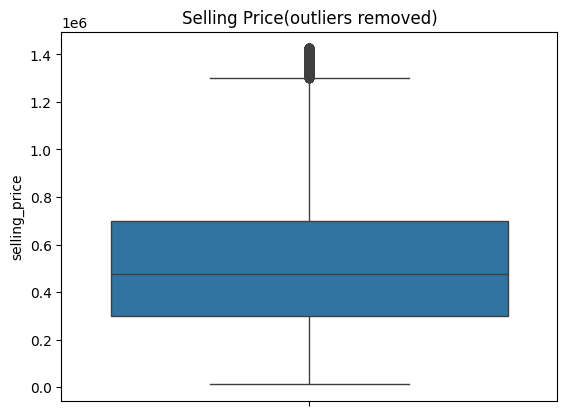

In [23]:
sns.boxplot(data=df_1,y='selling_price')
plt.title('Selling Price(outliers removed)')
plt.show()

In [24]:
q1=df_1['selling_price'].quantile(0.25)
q3=df_1['selling_price'].quantile(0.75)
iqr=q3-q1
df_1=df_1[~((df_1['selling_price']<(q1-1.5*iqr))|(df_1['selling_price']>(q3+1.5*iqr)))]

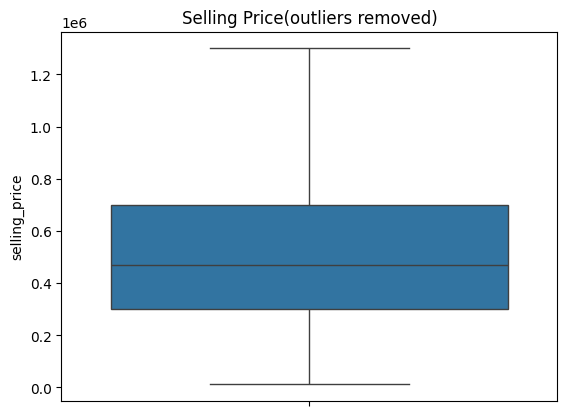

In [25]:
sns.boxplot(data=df_1,y='selling_price')
plt.title('Selling Price(outliers removed)')
plt.show()

## Year

In [26]:
print(f'The Oldest car in our dataset is from {df_1["year"].min()}')
print(f'The Newest car in our dataset is from {df_1["year"].max()}')

The Oldest car in our dataset is from 1983
The Newest car in our dataset is from 2023


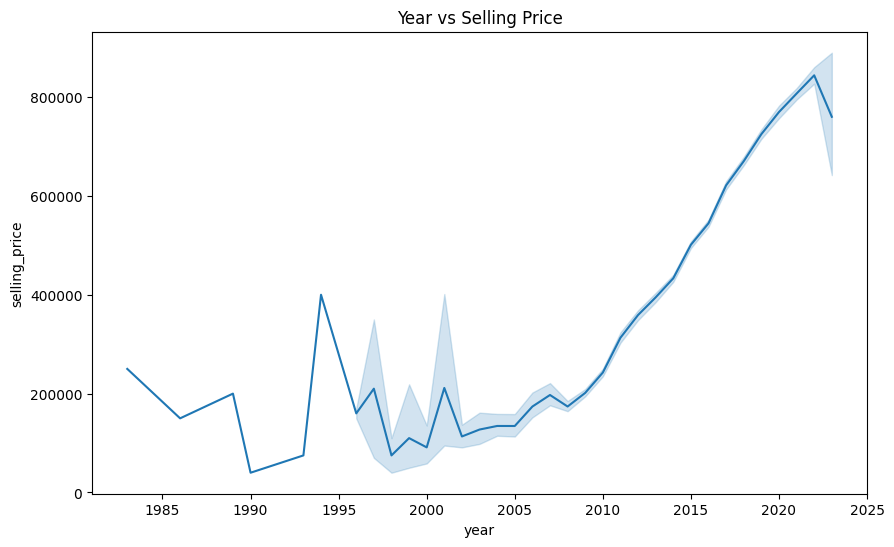

In [27]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_1,x='year',y='selling_price')
plt.title('Year vs Selling Price')
plt.ticklabel_format(style='plain')
plt.show()

## Kilometer Driven

In [28]:
print(f'The Minimum kilometer driven car in our dataset is from {df_1["km_driven"].min()}')
print(f'The Maximum kilometer driven car in our dataset is from {df_1["km_driven"].max()}')

The Minimum kilometer driven car in our dataset is from 101
The Maximum kilometer driven car in our dataset is from 995000


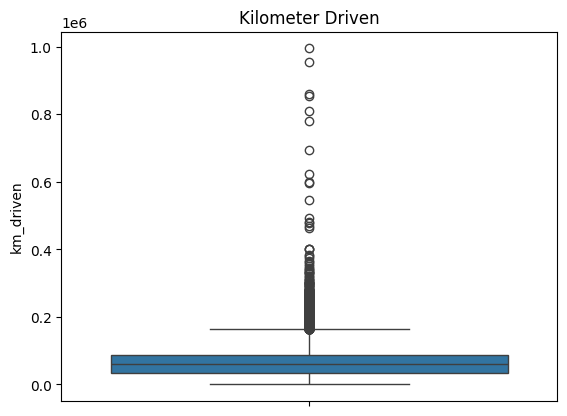

In [29]:
sns.boxplot(data=df_1,y='km_driven')
plt.title('Kilometer Driven')
plt.show()

In [30]:
q1=df_1['km_driven'].quantile(0.25)
q3=df_1['km_driven'].quantile(0.75)
iqr=q3-q1
df_1=df_1[~((df_1['km_driven']<(q1-1.5*iqr))|(df_1['km_driven']>(q3+1.5*iqr)))]

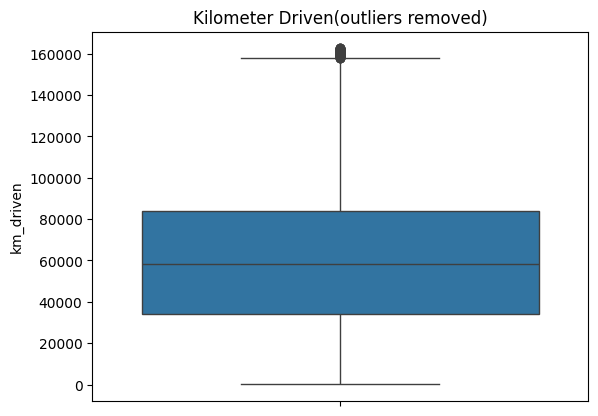

In [31]:
sns.boxplot(data=df_1,y='km_driven')
plt.title('Kilometer Driven(outliers removed)')
plt.show()

In [32]:
q1=df_1['km_driven'].quantile(0.25)
q3=df_1['km_driven'].quantile(0.75)
iqr=q3-q1
df_1=df_1[~((df['km_driven']<(q1-1.5*iqr))|(df['km_driven']>(q3+1.5*iqr)))]

<ipython-input-32-0fca031fec21>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1=df_1[~((df['km_driven']<(q1-1.5*iqr))|(df['km_driven']>(q3+1.5*iqr)))]


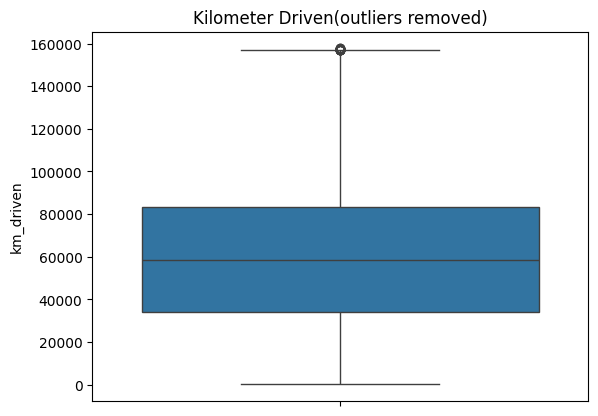

In [33]:
sns.boxplot(data=df_1,y='km_driven')
plt.title('Kilometer Driven(outliers removed)')
plt.show()

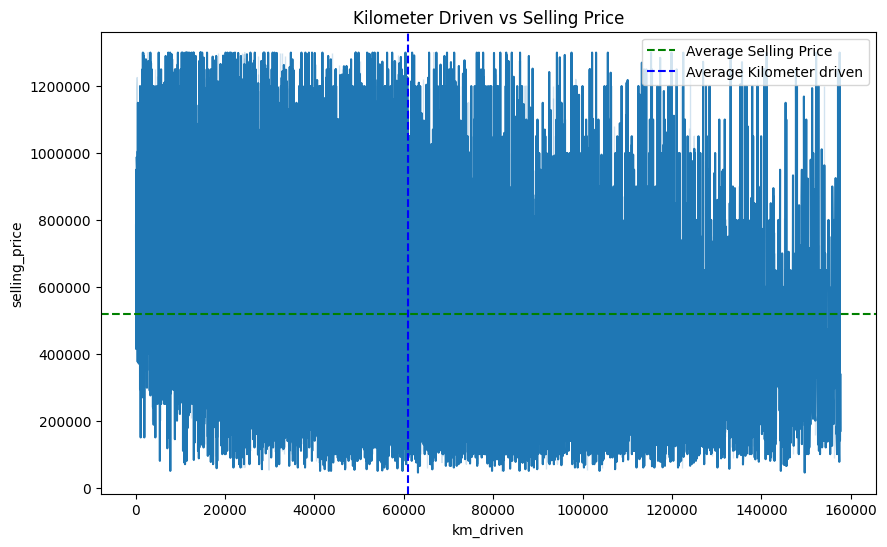

In [34]:

plt.figure(figsize=(10,6))
sns.lineplot(data=df_1,x='km_driven',y='selling_price')
plt.title('Kilometer Driven vs Selling Price')
plt.ticklabel_format(style='plain')
plt.axhline(df_1['selling_price'].mean(),color='g',linestyle='--',label='Average Selling Price')
plt.axvline(df_1['km_driven'].mean(),color='b',linestyle='--',label='Average Kilometer driven')
plt.legend()
plt.show()

##Fuel

In [35]:
df_1['fuel'].value_counts()

,count
fuel,
petrol,19992
diesel,10602
cng,1062
lpg,199
electric,41


Text(0.5, 1.0, 'Fuel Type Distribution')

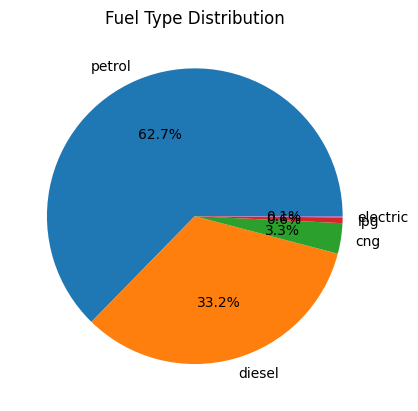

In [36]:
plt.pie(df_1['fuel'].value_counts(),labels=df_1['fuel'].value_counts().index,autopct='%1.1f%%')
plt.title('Fuel Type Distribution')

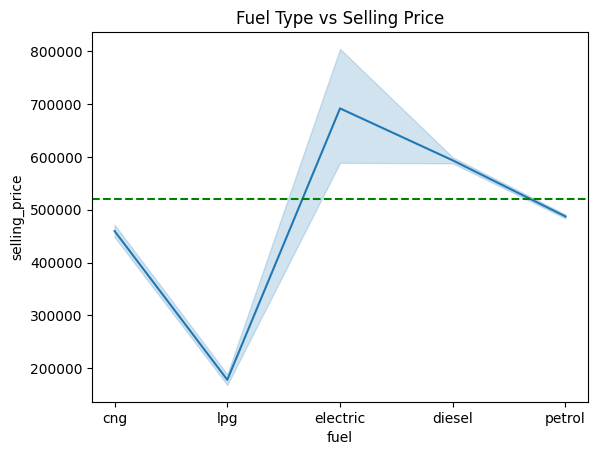

In [37]:
sns.lineplot(data=df_1,x='fuel',y='selling_price')
plt.title('Fuel Type vs Selling Price')
plt.axhline(df_1['selling_price'].mean(),color='g',linestyle='--',label='Average Selling Price')
plt.show()

## Seller Type

In [38]:
df_1['seller_type'].value_counts()

,count
seller_type,
dealer,26721
individual,5175


Text(0.5, 1.0, 'Seller Type Distribution')

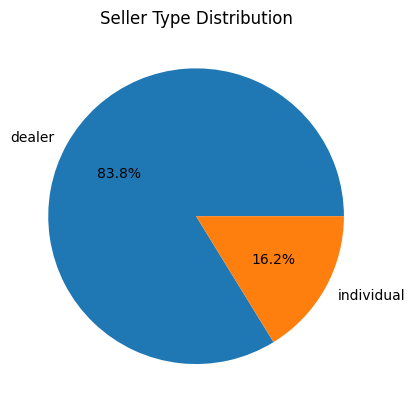

In [39]:
plt.pie(df_1['seller_type'].value_counts(),labels=df_1['seller_type'].value_counts().index,autopct='%1.1f%%')
plt.title('Seller Type Distribution')

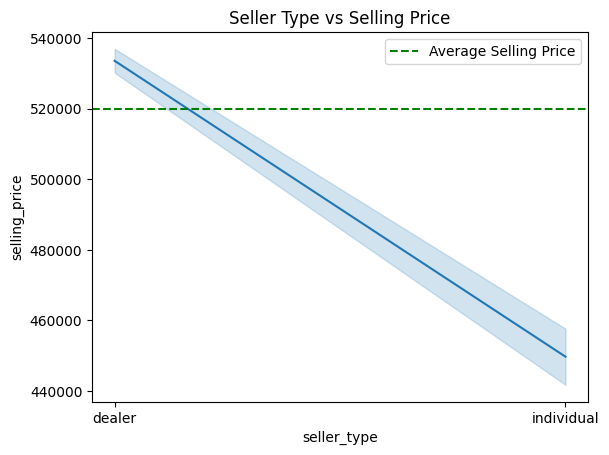

In [40]:
sns.lineplot(data=df_1,x='seller_type',y='selling_price')
plt.title('Seller Type vs Selling Price')
plt.axhline(df_1['selling_price'].mean(),color='g',linestyle='--',label='Average Selling Price')
plt.legend()
plt.show()

##Transmission

In [41]:
df_1['transmission'].value_counts()

,count
transmission,
manual,26896
automatic,5000


Text(0.5, 1.0, 'Transmission Distribution')

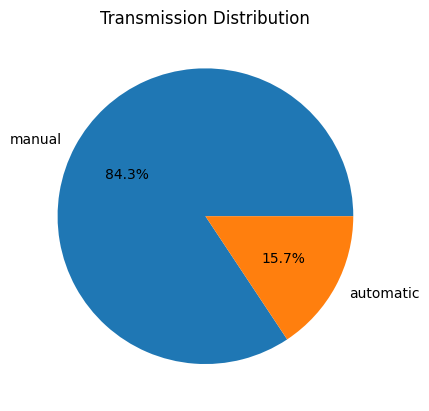

In [42]:
plt.pie(df_1['transmission'].value_counts(),labels=df['transmission'].value_counts().index,autopct='%1.1f%%')
plt.title('Transmission Distribution')

##Owner

In [43]:
df_1['owner'].value_counts()

,count
owner,
first,21958
second,7697
third,1781
fourth,402
fifth,52
unregistered car,6


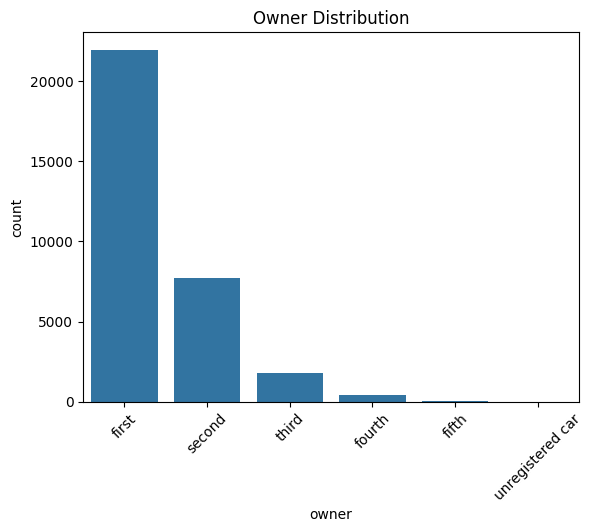

In [44]:
sns.countplot(data=df_1,x='owner')
plt.title('Owner Distribution')
plt.xticks(rotation=45)
plt.show()

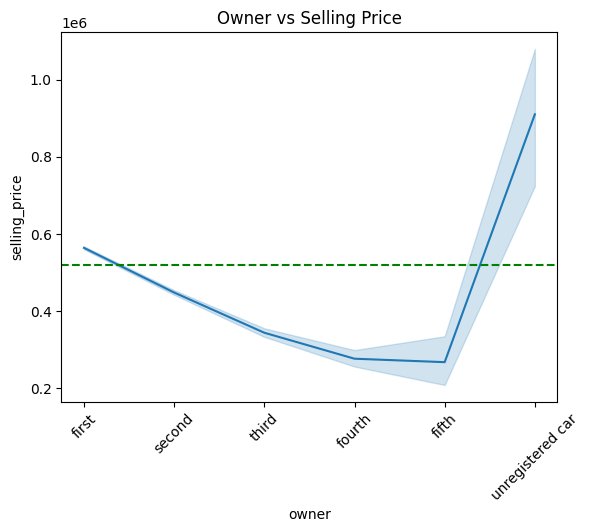

In [45]:
sns.lineplot(data=df_1,y='selling_price',x='owner')
plt.title('Owner vs Selling Price')
plt.axhline(df_1['selling_price'].mean(),color='g',linestyle='--',label='Average Selling Price')
plt.xticks(rotation=45)
plt.show()


##mileage

In [46]:
print(f'The Highest mileage car in our dataset is from {df_1["mileage"].max()}')
print(f'The Lowest mileage car in our dataset is from {df_1["mileage"].min()}')

The Highest mileage car in our dataset is from 40.9
The Lowest mileage car in our dataset is from 0.0


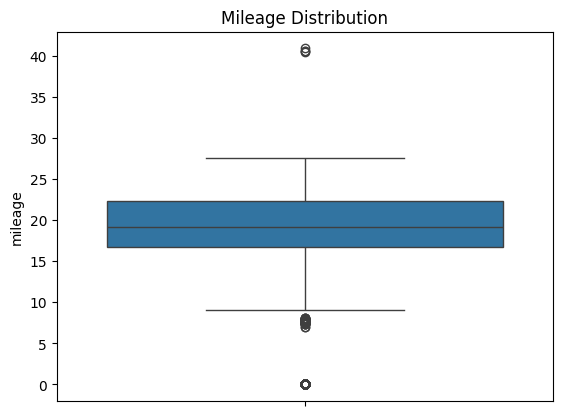

In [47]:
sns.boxplot(data=df_1,y='mileage')
plt.title('Mileage Distribution')
plt.show()

In [48]:
q1=df_1['mileage'].quantile(0.25)
q3=df_1['mileage'].quantile(0.75)
iqr=q3-q1

In [49]:
df_1=df_1[~((df_1['mileage']<(q1-1.5*iqr))|(df_1['mileage']>(q3+1.5*iqr)))]

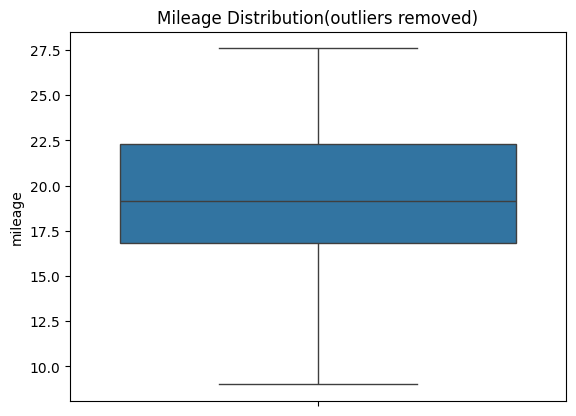

In [50]:
sns.boxplot(data=df_1,y='mileage')
plt.title('Mileage Distribution(outliers removed)')
plt.show()

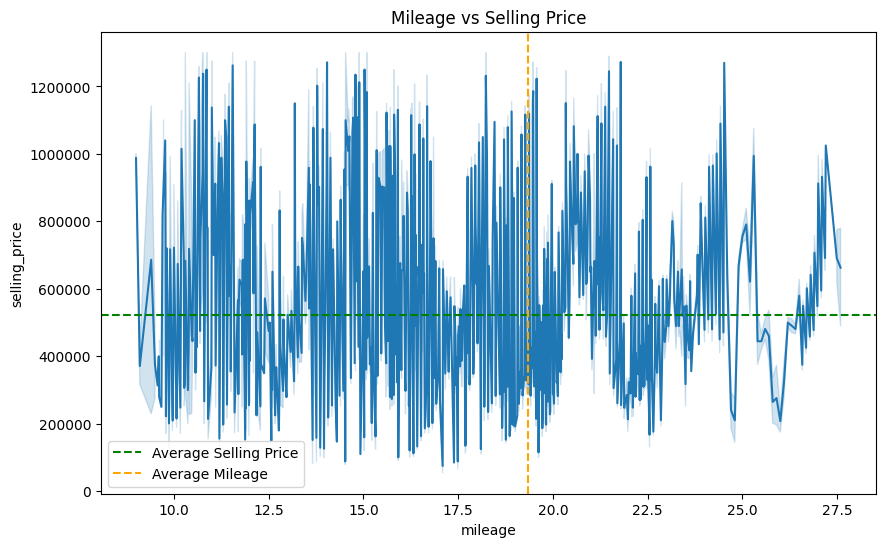

In [51]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_1,x='mileage',y='selling_price')
plt.title('Mileage vs Selling Price')
plt.axhline(df_1['selling_price'].mean(),color='g',linestyle='--',label='Average Selling Price')
plt.axvline(df_1['mileage'].mean(),color='orange',linestyle='--',label='Average Mileage')
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()

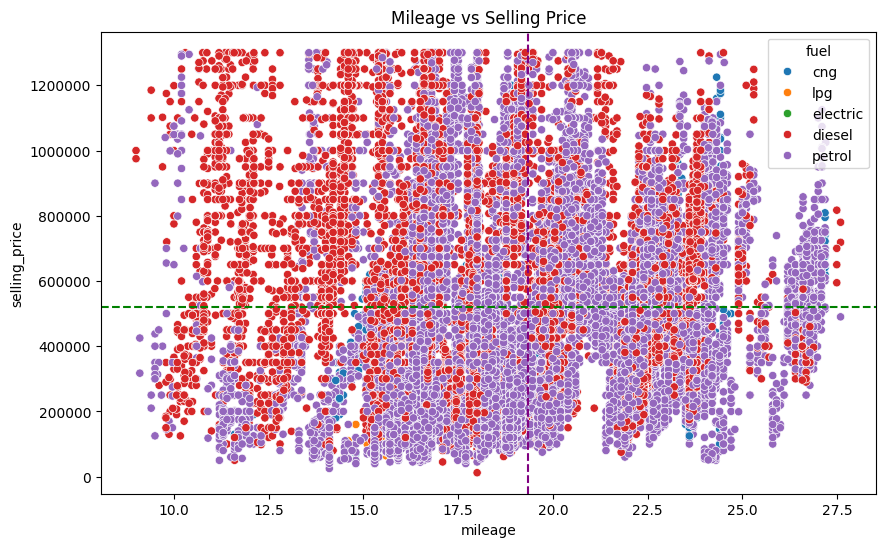

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_1,x='mileage',y='selling_price',hue='fuel')
plt.title('Mileage vs Selling Price')
plt.axhline(df_1['selling_price'].mean(),color='g',linestyle='--',label='Average Selling Price')
plt.axvline(df_1['mileage'].mean(),color='purple',linestyle='--',label='Average Mileage')
plt.ticklabel_format(style='plain')
plt.show()

##Engine(cc)

In [53]:
print(f'The Highest Engine cubic capacity in our dataset is from {df_1["engine"].max()}')
print(f'The Lowest Engine cubic capacity in our dataset is from {df_1["engine"].min()}')

The Highest Engine cubic capacity in our dataset is from 2999
The Lowest Engine cubic capacity in our dataset is from 624


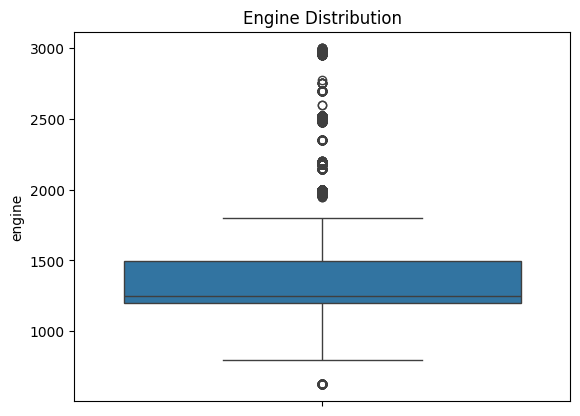

In [54]:
sns.boxplot(data=df_1,y='engine')
plt.title('Engine Distribution')
plt.show()

In [55]:
q1=df_1['engine'].quantile(0.25)
q3=df_1['engine'].quantile(0.75)
iqr=q3-q1


In [56]:
df_1=df_1[~((df['engine']<(q1-1.5*iqr))|(df_1['engine']>(q3+1.5*iqr)))]

<ipython-input-56-2bf685efab7d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1=df_1[~((df['engine']<(q1-1.5*iqr))|(df_1['engine']>(q3+1.5*iqr)))]


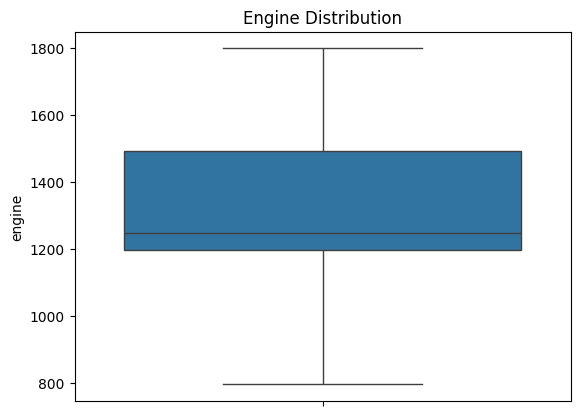

In [57]:
sns.boxplot(data=df_1,y='engine')
plt.title('Engine Distribution')
plt.show()

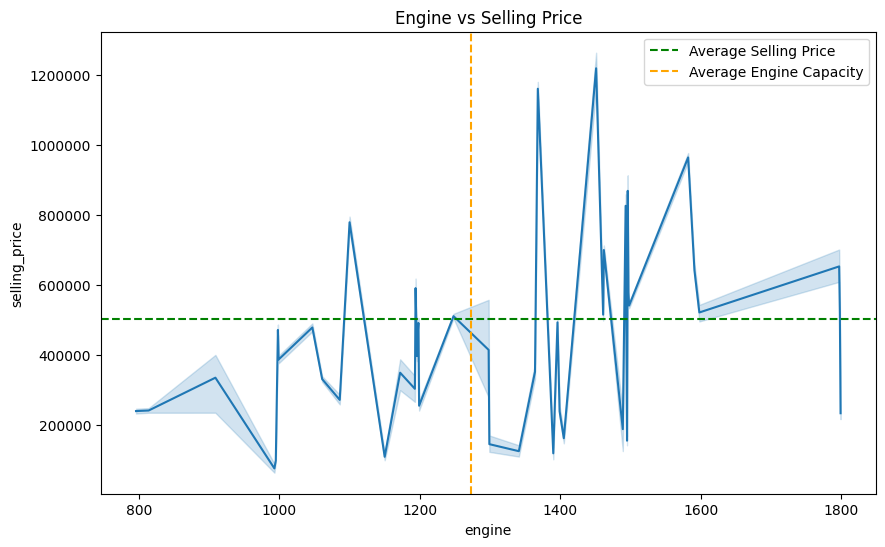

In [58]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_1,x='engine',y='selling_price')
plt.title('Engine vs Selling Price')
plt.axhline(df_1['selling_price'].mean(),color='g',linestyle='--',label='Average Selling Price')
plt.axvline(df_1['engine'].mean(),color='orange',linestyle='--',label='Average Engine Capacity')
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()


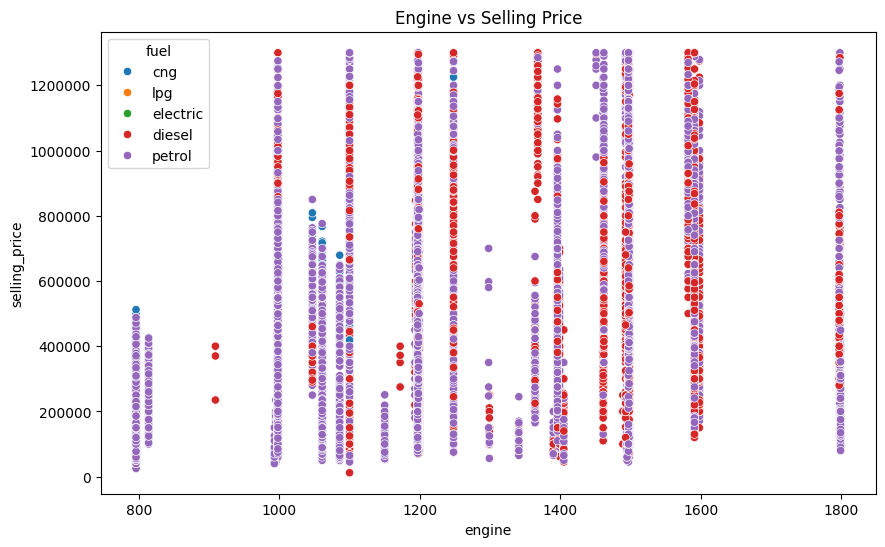

In [59]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_1,x='engine',y='selling_price',hue='fuel')
plt.title('Engine vs Selling Price')
plt.ticklabel_format(style='plain')
plt.show()

##MAX Power

In [60]:
print(f'The Highest Power in our dataset is from {df_1["power"].max()}')
print(f'The Lowest Power in our dataset is from {df_1["power"].min()}')

The Highest Power in our dataset is from 306.0
The Lowest Power in our dataset is from 0.0


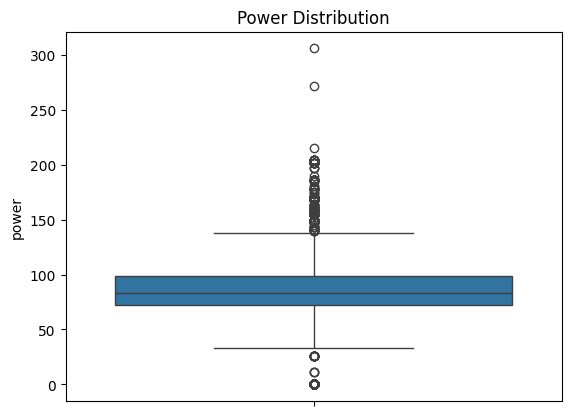

In [61]:
sns.boxplot(data=df_1,y='power')
plt.title('Power Distribution')
plt.show()

In [62]:
q1=df_1['power'].quantile(0.25)
q3=df_1['power'].quantile(0.75)
iqr=q3-q1

In [63]:
df_1=df_1[~((df_1['power']<(q1-1.5*iqr))|(df_1['power']>(q3+1.5*iqr)))]

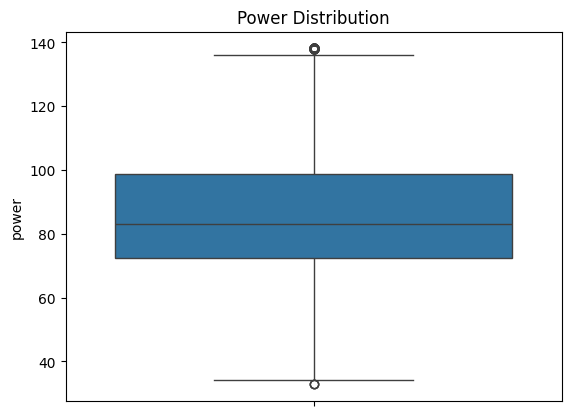

In [64]:
sns.boxplot(data=df_1,y='power')
plt.title('Power Distribution')
plt.show()

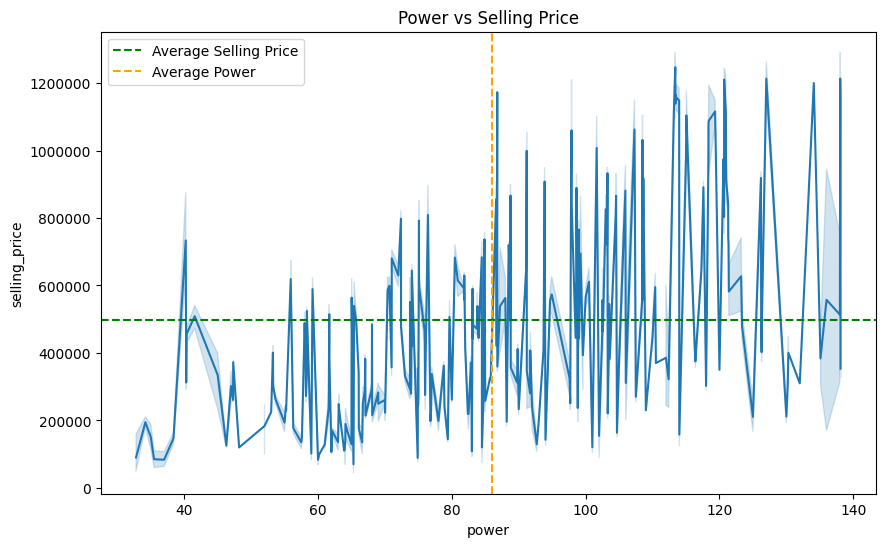

In [65]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_1,x='power',y='selling_price')
plt.title('Power vs Selling Price')
plt.axhline(df_1['selling_price'].mean(),color='g',linestyle='--',label='Average Selling Price')
plt.axvline(df_1['power'].mean(),color='orange',linestyle='--',label='Average Power')
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()

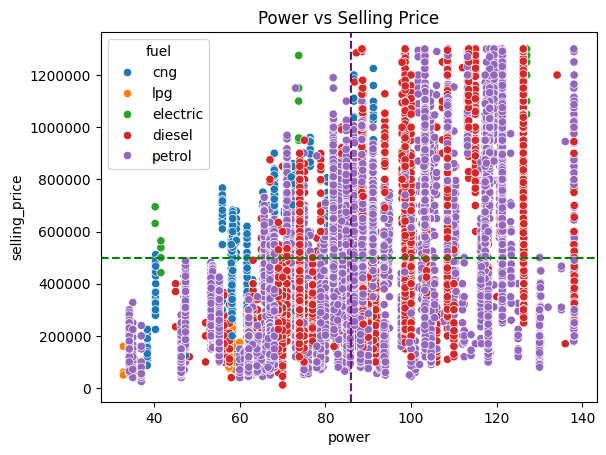

In [66]:
sns.scatterplot(data=df_1,x='power',y='selling_price',hue='fuel')
plt.title('Power vs Selling Price')
plt.axhline(df_1['selling_price'].mean(),color='g',linestyle='--',label='Average Selling Price')
plt.axvline(df_1['power'].mean(),color='purple',linestyle='--',label='Average Power')
plt.ticklabel_format(style='plain')
plt.show()

## Seats

In [67]:
df_1['seats'].value_counts()

,count
seats,
5,26797
7,1127
6,185
8,137
4,81
2,14
10,6
9,2


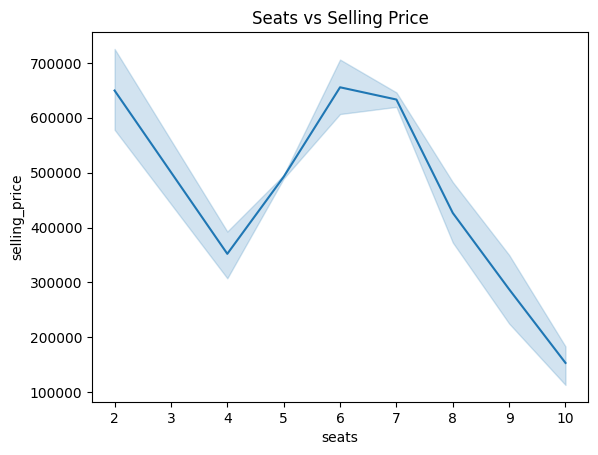

In [68]:
sns.lineplot(data=df_1,x='seats',y='selling_price')
plt.title('Seats vs Selling Price')
plt.ticklabel_format(style='plain')
plt.show()


##Doors

In [69]:
print(f'The Minimum Doors in our dataset is from {df_1["doors"].min()}')
print(f'The Maximum Doors in our dataset is from {df_1["doors"].max()}')

The Minimum Doors in our dataset is from 2
The Maximum Doors in our dataset is from 6


In [70]:
df_1['doors'].value_counts()

,count
doors,
5,19130
4,9189
2,13
6,11
3,6


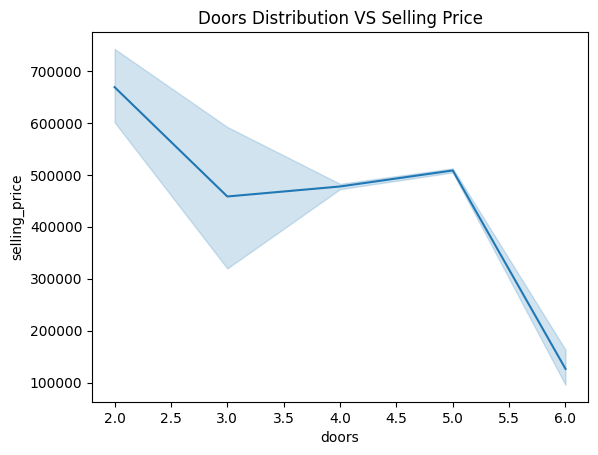

In [71]:
sns.lineplot(data=df_1,x='doors',y='selling_price')
plt.title('Doors Distribution VS Selling Price')
plt.show()

##State

In [72]:
state=df_1['state'].value_counts()
top_state=state.head(25)
state

,count
state,
maharashtra,6495
karnataka,3886
delhi,3373
uttar pradesh,2991
haryana,2841
gujarat,2313
telangana,950
west bengal,922
rajasthan,864


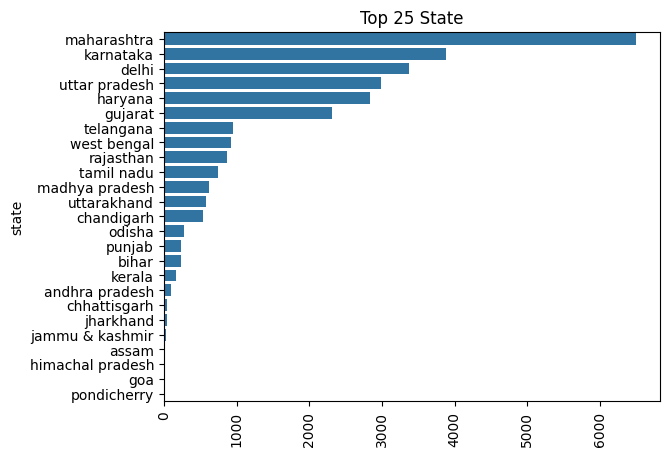

In [73]:
sns.barplot(x=top_state.values,y=top_state.index)
plt.title('Top 25 State')
plt.xticks(rotation=90)
plt.show()

##Company

In [74]:
print(df_1['company'].value_counts())
top_company=df_1['company'].value_counts().head(15)

company
maruti           9672
hyundai          6878
honda            3605
tata             1324
renault          1150
ford             1045
volkswagen        933
chevrolet         697
skoda             611
nissan            609
mahindra          556
toyota            382
datsun            355
kia               335
fiat              162
mercedes-benz      10
mg                  7
mitsubishi          4
ambassador          4
icml                3
premier             2
ashok               1
bmw                 1
mini                1
citroen             1
opelcorsa           1
Name: count, dtype: int64


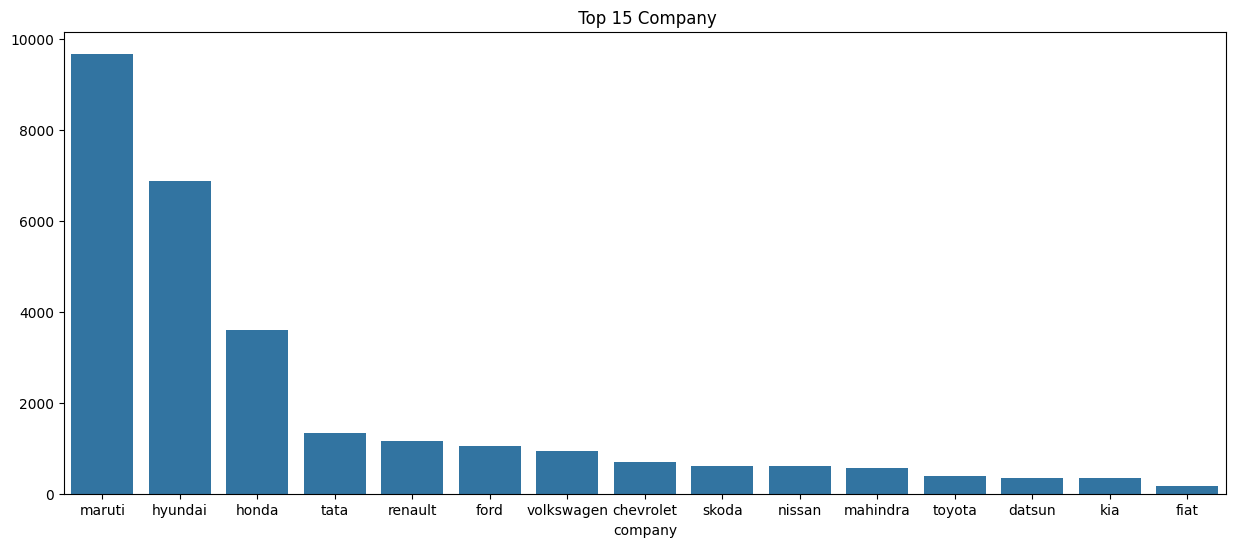

In [75]:
plt.figure(figsize=(15,6))
sns.barplot(y=top_company.values,x=top_company.index)
plt.title(' Top 15 Company')
plt.show()

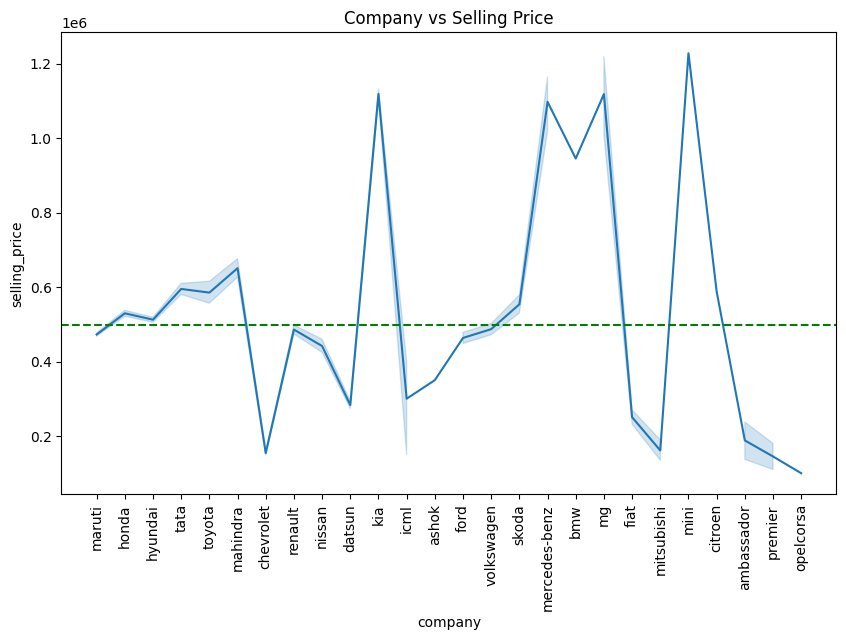

In [76]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_1,y='selling_price',x='company')
plt.title('Company vs Selling Price')
plt.axhline(df_1['selling_price'].mean(),color='g',linestyle='--',label='Average Selling Price')
plt.xticks(rotation=90)
plt.show()

##Model

In [77]:
print(df['model'].value_counts())
mod=df['model'].value_counts().head(25)

model
city           1908
i20            1501
swift          1439
wagon r        1408
swift dzire    1185
               ... 
prado             1
amg a 35          1
cooper se         1
g                 1
c3                1
Name: count, Length: 378, dtype: int64


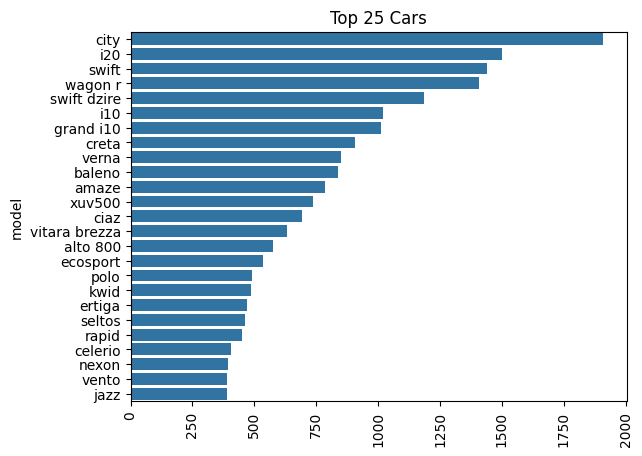

In [78]:
sns.barplot(x=mod.values,y=mod.index)
plt.title('Top 25 Cars')
plt.xticks(rotation=90)
plt.show()

In [79]:
categorical_columns=[]
for i in df_1.columns:
  if df_1[i].dtype=='object':
    categorical_columns.append(i)

In [80]:
categorical_columns

['fuel', 'seller_type', 'transmission', 'owner', 'state', 'company', 'model']

In [81]:
le=LabelEncoder()
for i in categorical_columns:
  df_1[i]=le.fit_transform(df_1[i])
  print(f'The {i} column is encoded and the categories are converted as {dict(zip(le.classes_,le.fit_transform(le.classes_)))}')

The fuel column is encoded and the categories are converted as {'cng': 0, 'diesel': 1, 'electric': 2, 'lpg': 3, 'petrol': 4}
The seller_type column is encoded and the categories are converted as {'dealer': 0, 'individual': 1}
The transmission column is encoded and the categories are converted as {'automatic': 0, 'manual': 1}
The owner column is encoded and the categories are converted as {'fifth': 0, 'first': 1, 'fourth': 2, 'second': 3, 'third': 4, 'unregistered car': 5}
The state column is encoded and the categories are converted as {'andhra pradesh': 0, 'arunachal pradesh': 1, 'assam': 2, 'bihar': 3, 'chandigarh': 4, 'chhattisgarh': 5, 'dadra and nagar haveli': 6, 'daman and diu': 7, 'delhi': 8, 'goa': 9, 'gujarat': 10, 'haryana': 11, 'himachal pradesh': 12, 'jammu & kashmir': 13, 'jharkhand': 14, 'karnataka': 15, 'kerala': 16, 'madhya pradesh': 17, 'maharashtra': 18, 'manipur': 19, 'meghalaya': 20, 'nagaland': 21, 'odisha': 22, 'pondicherry': 23, 'punjab': 24, 'rajasthan': 25, 'sik

In [108]:
correlation_df=[]
for i in df_1.columns:
  if i not in categorical_columns:
    correlation_df.append(i)

In [111]:
corr_df=df_1[correlation_df]

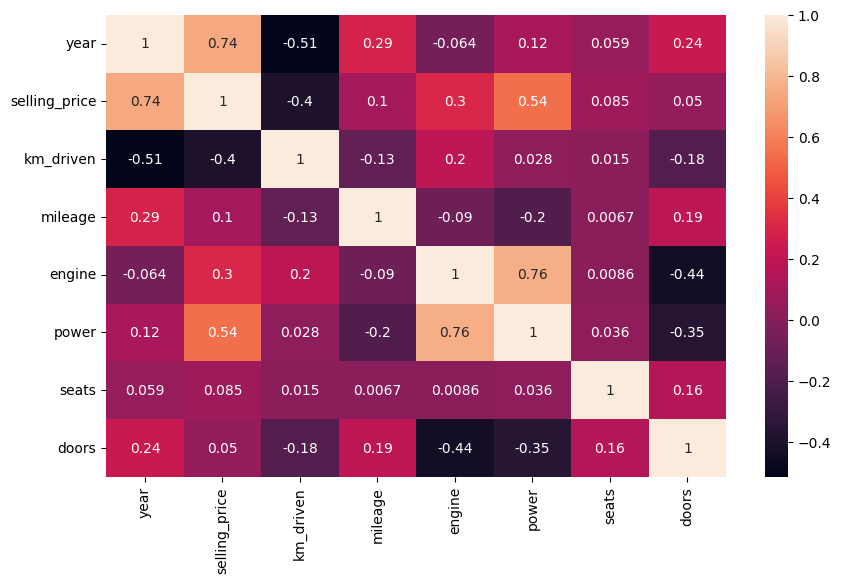

In [112]:
  plt.figure(figsize=(10,6))
  sns.heatmap(corr_df.corr(),annot=True)
  plt.show()

From the heat map of the correlation chart it is found that the selling price of the car is directly proportional to the model year of the car that is if the model year of the car is increasing the selling price of the car is also increasing
  And the price of the car is inversely proportional to the kilometer driven that is if the kilometer driven of the car is more then the corresponding price of the car will be less and vice versa

##Spliting the data for training the model

In [83]:
X=df_1.drop('selling_price',axis=1)
y=df_1['selling_price']

In [84]:
X

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,power,seats,doors,state,company,model
0,2016,69162,0,0,1,1,16.60,1061,58.16,5,5,30,13,160
1,2015,45864,0,0,1,1,22.20,998,58.20,5,5,18,13,35
2,2015,81506,0,0,1,3,23.80,1498,86.70,5,4,8,8,11
3,2013,115893,0,0,1,3,16.20,1061,58.20,5,4,8,13,160
4,2022,18900,0,0,1,1,24.42,1248,86.63,7,5,18,13,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37808,2018,49882,1,0,1,3,16.50,1198,108.50,5,5,18,23,106
37809,2011,82843,1,0,1,1,19.82,1248,88.80,5,4,18,23,100
37810,2020,58000,1,0,1,1,18.00,1100,88.77,5,5,18,23,10
37811,2014,62000,1,0,1,1,18.00,1100,69.00,5,5,18,23,84


In [85]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=7)

In [86]:
reg=LinearRegression()

In [87]:
reg.fit(x_train,y_train)

LinearRegression()

In [88]:
y_pred=reg.predict(x_test)

In [89]:
accuracy=r2_score(y_test,y_pred)

In [90]:
print(f'The accuracy score of the Linear Regression model is {round(accuracy*100,2)}')

The accuracy score of the Linear Regression model is 77.9


In [91]:
#reg.predict([[2012,50000,1,0,1,0,17,1400,5,100,16,64]])

##Predicting Price for the user

In [92]:
X.columns

Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'mileage', 'engine', 'power', 'seats', 'doors', 'state', 'company',
       'model'],
      dtype='object')

In [107]:

year=int(input('Enter the year of the car: '))
km_driven=int(input('Enter the kilometer driven of the car: '))
fuel=int(input('Enter the fuel type of the car(0 for cng,1 for diesel,2 for electric,3 for lpg,4 for petrol): '))
seller_type=int(input('Enter the seller type of the car(0 for dealer,1 for individual): '))
transmission=int(input('Enter the transmission type of the car(0 for Automatic,1 for Manual): '))
owner=int(input('Enter the owner of the car(0 for fifth,1 for first,2 for fourth,3 for second,4 for third,5 for unregistered car): '))
mileage=float(input('Enter the mileage of the car: '))
engine=int(input('Enter the engine of the car: '))
power=float(input('Enter the max power of the car: '))
seats=int(input('Enter the seats of the car: '))
doors=int(input('Enter the doors of the car: '))
state=int(input("""Enter the state of the car(andhra pradesh: 0, arunachal pradesh: 1, assam: 2, bihar: 3, chandigarh: 4, chhattisgarh: 5, dadra and nagar haveli: 6,\n
 daman and diu: 7, delhi: 8, goa: 9, gujarat: 10, haryana: 11, himachal pradesh: 12, jammu & kashmir: 13, jharkhand: 14, karnataka: 15, kerala: 16,\n
  madhya pradesh: 17, maharashtra: 18, manipur: 19, meghalaya: 20, nagaland: 21, odisha: 22, pondicherry: 23, punjab: 24, rajasthan: 25, sikkim: 26, tamil nadu: 27, telangana: 28,\n
 tripura: 29, uttar pradesh: 30, uttarakhand: 31, west bengal: 32):"""))
company=int(input("""Enter the company of the car(ambassador: 0, ashok: 1, bmw: 2, chevrolet: 3, citroen: 4, datsun: 5, fiat: 6, ford: 7, honda: 8, hyundai: 9, icml: 10, kia: 11,\n
 mahindra: 12, maruti: 13, mercedes-benz: 14, mg: 15, mini: 16, mitsubishi: 17, nissan: 18, opelcorsa: 19, premier: 20, renault: 21, skoda: 22,\n
  tata: 23, toyota: 24, volkswagen: 25):"""))
model=int(input("""Enter the model of the car( 1 series: 1, 800: 2, a class: 3, a-star: 4, accent: 5, alto: 6, alto 2021: 7, alto 800: 8, alto k10: 9, altroz: 10, amaze: 11, ameo: 12,\n
 aspire: 13, astor: 14, aura: 15, aveo: 16, aveo u-va: 17, avventura: 18, avventura urban cross: 19, baleno: 20, baleno rs: 21, beat: 22, bolero camper: 23, bolero maxi truck plus: 24,\n
  bolero neo: 25, bolero pik up extra long: 26, bolt: 27, br-v: 28, brezza: 29, brio: 30, c3: 31, captur: 32, carens: 33, cedia: 34, celerio: 35, celerio x: 36, ciaz: 37, ciaz s: 38, city: 39,\n
  civic: 40, classic: 41, cooper: 42, corolla: 43, corolla altis: 44, creta: 45, crosspolo: 46, duster: 47, e verito: 48, ecosport: 49, eeco: 50, eeco cargo: 51, elantra: 52, elite i20 2018: 53,\n
  enjoy: 54, eon: 55, ertiga: 56, ertiga tour: 57, etios: 58, etios 2014-2016: 59, etios cross: 60, etios liva: 61, evalia: 62, extreme: 63, fabia: 64, fiesta: 65, figo: 66, fluence: 67, freestyle: 68,\n
  fusion: 69, getz: 70, glanza: 71, go: 72, go plus: 73, grand i10: 74, grand i10 nios: 75, grande punto: 76, gypsy: 77, i10: 78, i20: 79, i20 active: 80, i20 n line: 81, ignis: 82, ikon: 83, indica ev2: 84,\n
  indica xeta: 85, indigo: 86, indigo marina: 87, jazz: 88, kicks: 89, kiger: 90, kushaq: 91, kuv 100: 92, kuv 100 nxt: 93, kwid: 94, leyland stile: 95, linea: 96, linea classic: 97, lodgy: 98, magnite: 99,\n
  manza: 100, marazzo: 101, micra: 102, micra active: 103, mobilio: 104, new laura: 105, nexon: 106, nexon ev prime: 107, nuvosport: 108, omni: 109, platinum etios: 110, polo: 111, prius: 112, pulse: 113,\n
  punch: 114, punto evo: 115, punto pure: 116, quanto: 117, rapid: 118, redigo: 119, renault logan: 120, rhino rx: 121, rio: 122, ritz: 123, s-presso: 124, sail: 125, sail hatchback: 126, santro: 127, santro xing: 128,\n
  scala: 129, seltos: 130, slavia: 131, sonet: 132, spark: 133, sumo victa: 134, sunny: 135, super carry: 136, superb: 137, supro: 138, swift: 139, swift dzire: 140, swift dzire tour: 141, sx4: 142, sx4 s cross: 143,\n
  taigun: 144, terrano: 145, tiago: 146, tiago nrg: 147, tigor: 148, tigor ev: 149, triber: 150, tuv 300: 151, urban cruiser: 152, vento: 153, venue: 154, verito: 155, verito vibe: 156, verna: 157, versa: 158,\n
  vitara brezza: 159, wagon r: 160, wagon r stingray: 161, wr-v: 162, x-trail: 163, xcent: 164, xcent prime: 165, xl6: 166, xuv300: 167, yaris: 168, yodha pickup: 169, zen: 170, zen estilo: 171, zest: 172): """))
user_price=reg.predict([[year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,power,seats,doors,state,company,model]])
print("""

""")
print(f'The Market price for your car is Rupees:{round(user_price[0])}')
print("""

""")


Enter the year of the car: 2009
Enter the kilometer driven of the car: 70000
Enter the fuel type of the car(0 for cng,1 for diesel,2 for electric,3 for lpg,4 for petrol): 1
Enter the seller type of the car(0 for dealer,1 for individual): 1
Enter the transmission type of the car(0 for Automatic,1 for Manual): 1
Enter the owner of the car(0 for fifth,1 for first,2 for fourth,3 for second,4 for third,5 for unregistered car): 1
Enter the mileage of the car: 18
Enter the engine of the car: 1250
Enter the max power of the car: 90
Enter the seats of the car: 5
Enter the doors of the car: 5
Enter the state of the car(andhra pradesh: 0, arunachal pradesh: 1, assam: 2, bihar: 3, chandigarh: 4, chhattisgarh: 5, dadra and nagar haveli: 6,

 daman and diu: 7, delhi: 8, goa: 9, gujarat: 10, haryana: 11, himachal pradesh: 12, jammu & kashmir: 13, jharkhand: 14, karnataka: 15, kerala: 16,

  madhya pradesh: 17, maharashtra: 18, manipur: 19, meghalaya: 20, nagaland: 21, odisha: 22, pondicherry: 23, pun

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
